In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy as sp
import re
from pprint import pprint
from tqdm import tqdm

In [19]:
def get_experiments_list(base_path="/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results/",model="ff",dataset="mnist"):
    path=f"{base_path}/{model}/{dataset}/"
    experiments_list=os.listdir(path)
    path_list=list()
    for exp in experiments_list:
        exp=f"{path}/{exp}"
        path_list.append(exp)
    return path_list

In [20]:
def base_info(path):
    d = dict()
    d["name"]=os.path.basename(path)
    split=d["name"].split("_")
    d["norm"]=split[1]
    d["epochs"]=float(split[2])
    d["batch"]=int(split[3])
    d["lr"]=float(split[4])
    d["path"]=path
    return d

def parse_stat(path):
    d=base_info(path)
    try:
        with open(f"{path}/stats.txt", mode="r") as file:
            for line in file:
                
                if groups:=re.search(r"Total Accuracy (?P<total_accuracy>[0-9][0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    d["accuracy"]=float(group_dict["total_accuracy"])
                    
                if groups:=re.search(r"Accuracy (?P<class>[0-9]) (?P<class_accuracy>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    label=group_dict["class"]
                    d[f"class_accuracy_{label}"]=float(group_dict["class_accuracy"])

                if groups:=re.search(r"Layer (?P<layer>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    d[f"sparseness_layer_{layer}"]=float(group_dict["sparseness"])
                    
                if groups:=re.search(r"Layer (?P<layer>[0-9]) (?P<class>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    label=group_dict["class"]
                    d[f"sparseness_layer_{layer}_class_{label}"]=float(group_dict["sparseness"])
                    #print(groups.groupdict())
        return d
    except Exception as e:
        print(f"Error opening {e}")
#        df = pd.DataFrame(data, index=[0])


In [21]:
parse_stat("/u/area/ntosato/FF/results/ff/mnist/relu_l2_200_1024_0.01").keys()

dict_keys(['name', 'norm', 'epochs', 'batch', 'lr', 'path', 'accuracy', 'class_accuracy_0', 'class_accuracy_1', 'class_accuracy_2', 'class_accuracy_3', 'class_accuracy_4', 'class_accuracy_5', 'class_accuracy_6', 'class_accuracy_7', 'class_accuracy_8', 'class_accuracy_9', 'sparseness_layer_0', 'sparseness_layer_1', 'sparseness_layer_2', 'sparseness_layer_0_class_0', 'sparseness_layer_0_class_1', 'sparseness_layer_0_class_2', 'sparseness_layer_0_class_3', 'sparseness_layer_0_class_4', 'sparseness_layer_0_class_5', 'sparseness_layer_0_class_6', 'sparseness_layer_0_class_7', 'sparseness_layer_0_class_8', 'sparseness_layer_0_class_9', 'sparseness_layer_1_class_0', 'sparseness_layer_1_class_1', 'sparseness_layer_1_class_2', 'sparseness_layer_1_class_3', 'sparseness_layer_1_class_4', 'sparseness_layer_1_class_5', 'sparseness_layer_1_class_6', 'sparseness_layer_1_class_7', 'sparseness_layer_1_class_8', 'sparseness_layer_1_class_9', 'sparseness_layer_2_class_0', 'sparseness_layer_2_class_1', 's

In [22]:
list_exp=get_experiments_list(dataset="mnist",model="ff")

df_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_ff= pd.concat([df_ff, pd.DataFrame([data])], ignore_index=True)   
df_ff=df_ff[(df_ff["accuracy"]>0.93) & (df_ff["norm"]=="l2") & (df_ff["batch"]==1024) ]
print(df_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

     accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2      0.9348            0.716365            0.604948            0.428884
13     0.9303            0.629663            0.630691            0.473128
29     0.9349            0.731048            0.645343            0.472864
44     0.9439            0.750273            0.593829            0.390634
57     0.9558            0.787236            0.569731            0.526007
63     0.9400            0.739850            0.585474            0.419264
65     0.9576            0.807095            0.547899            0.442263
81     0.9376            0.844812            0.633252            0.755735
97     0.9509            0.901115            0.385125            0.593094
101    0.9521            0.768435            0.580640            0.608185


In [23]:
list_exp=get_experiments_list(dataset="mnist",model="bp")

df_bp=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp= pd.concat([df_bp, pd.DataFrame([data])], ignore_index=True)   
#print(df_bp)
df_bp=df_bp[(df_bp["accuracy"]>0.94) & (df_bp["norm"]=="l2") & (df_bp["batch"]==1024)  ]
print(df_bp[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])
print(df_bp.loc[45]["path"])

    accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2     0.9808            0.313458            0.187971            0.227225
4     0.9814            0.323325            0.187314            0.214111
5     0.9820            0.531103            0.403842            0.365603
7     0.9851            0.594765            0.455802            0.403289
8     0.9772            0.311424            0.208880            0.244209
11    0.9820            0.561983            0.430437            0.385102
12    0.9860            0.591513            0.448171            0.394725
13    0.9674            0.955733            0.871967            0.882086
29    0.9851            0.495227            0.365395            0.339543
30    0.9808            0.316683            0.196384            0.222332
31    0.9859            0.590000            0.453603            0.399336
32    0.9631            0.296601            0.221982            0.256222
34    0.9575            0.956241            0.85775

In [24]:
list_exp=get_experiments_list(dataset="mnist",model="bp_ff")

df_bp_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp_ff= pd.concat([df_bp_ff, pd.DataFrame([data])], ignore_index=True)   
df_bp_ff=df_bp_ff[(df_bp_ff["accuracy"]>0.97) & (df_bp_ff["norm"]=="l2") & (df_bp_ff["batch"]==1024)  ]
print(df_bp_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

    accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2     0.9705            0.938123            0.690482            0.038087
17    0.9708            0.907045            0.809879            0.259167
29    0.9715            0.936608            0.793427            0.255138
57    0.9710            0.963385            0.759814            0.319581


In [25]:
df_ff.loc[101]

name                                                     relu_l2_200_1024_0.001
norm                                                                         l2
epochs                                                                    200.0
batch                                                                      1024
lr                                                                        0.001
path                          /orfeo/cephfs/home/area/ntosato/scratch/pippo/...
accuracy                                                                 0.9521
class_accuracy_0                                                       0.986735
class_accuracy_1                                                       0.989427
class_accuracy_2                                                       0.944767
class_accuracy_3                                                       0.947525
class_accuracy_4                                                       0.954175
class_accuracy_5                        

In [26]:
selected_model={"ff":[df_ff,81],
                "bp":[df_bp,29],
                "bp_ff":[df_bp_ff,29]}

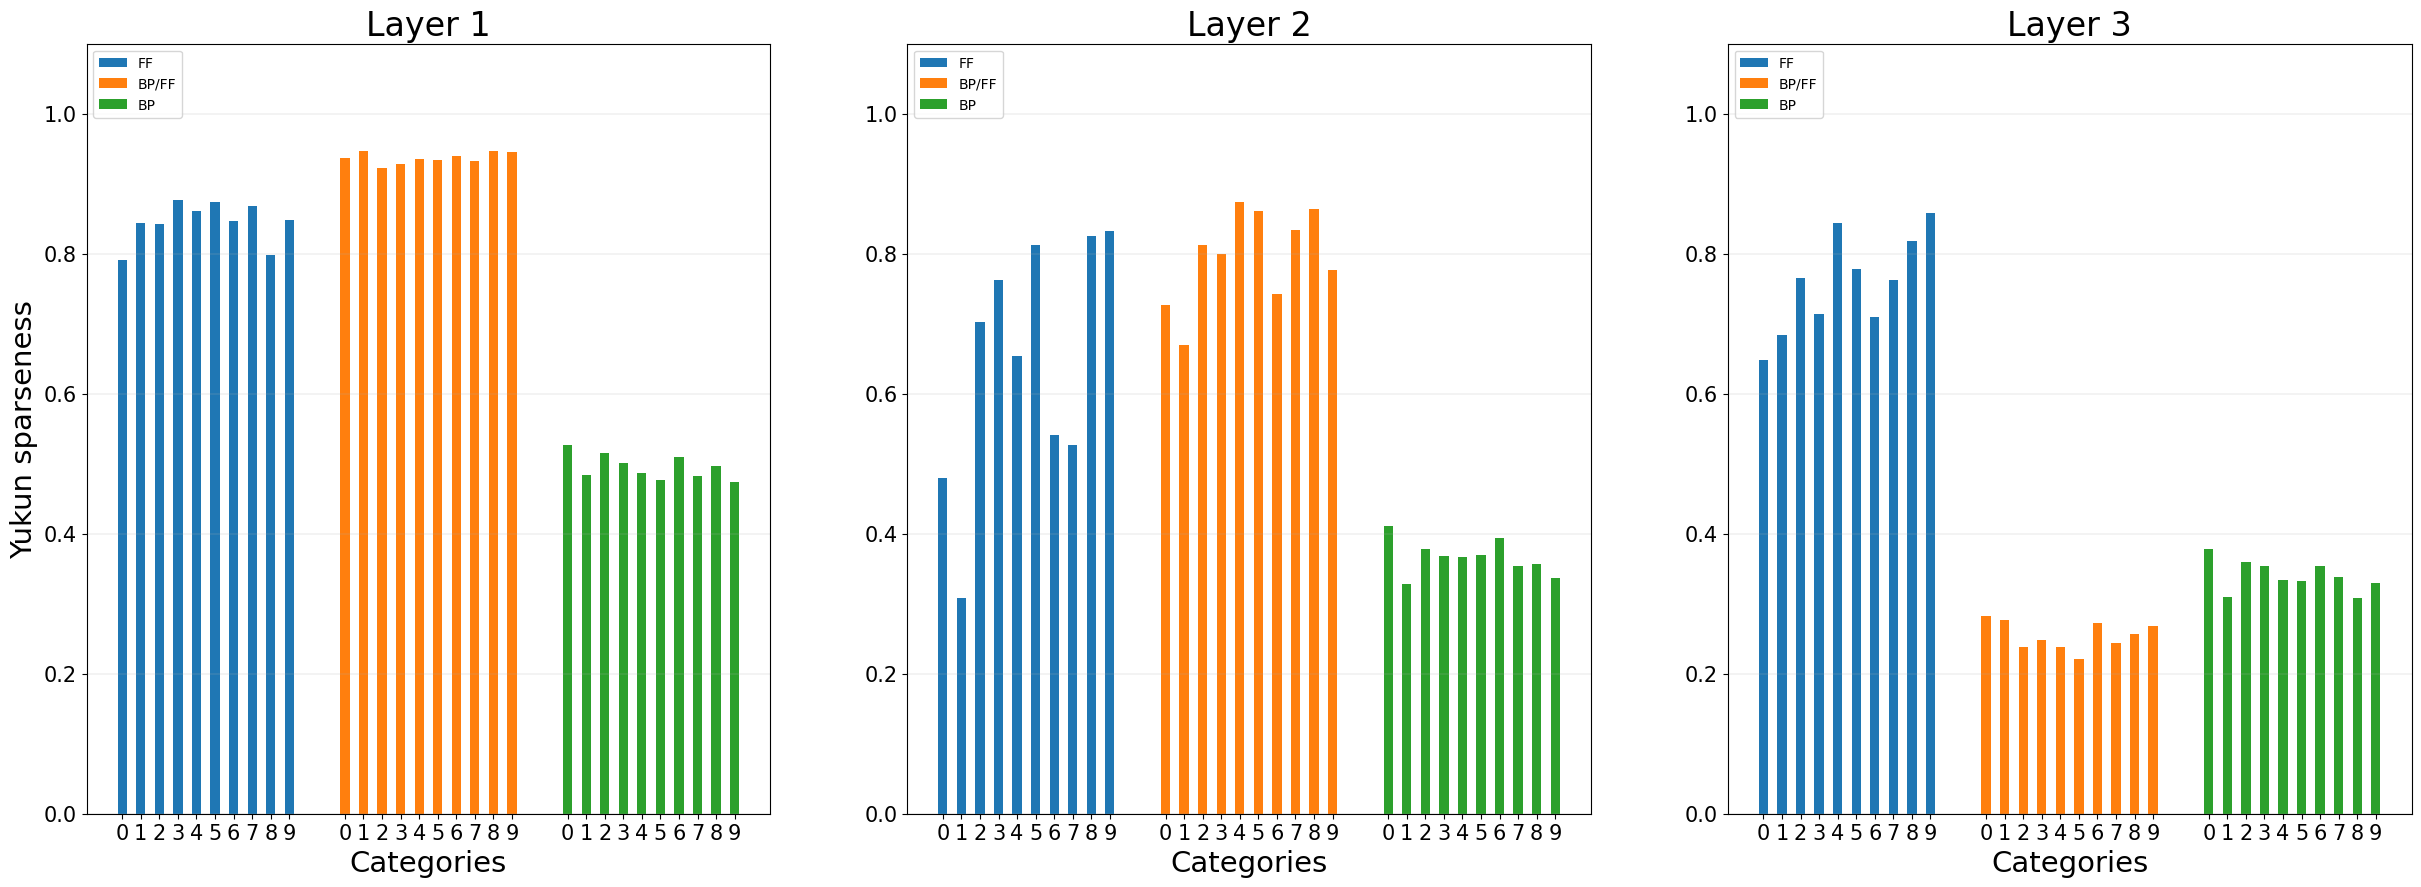

In [27]:
def calculateSize(selected_model):
    '''
    Calculate  the size of the ensembles for each model,layer and category.
    '''
    jitter=np.array([i/10 for i in range(0,10)])
    labels=[i for j in range(3) for i in range(10)]
    #with plt.style.context("_mpl-gallery-nogrid"):
    plt.figure(figsize=(30,10))
    for layer in range(3):
        plt.subplot(1,3,1+layer)
        i=0
        ticks=list()
        for model in ['ff','bp_ff','bp']:
            i+=1.2
            dataframe,index=selected_model[model]
            units=list()
            for lbl in range(10):
                units.append(dataframe.loc[index][f"sparseness_layer_{layer}_class_{lbl}"])
            plt.ylim([0,1.1])
            #plt.yscale("log")
            plt.bar(i+jitter,units,label=model,width=0.05)
            ticks+=(i+jitter).tolist()
        plt.legend(labels=['FF','BP/FF','BP'],loc='upper left')
        plt.title(f'Layer {layer+1}',fontsize=24)
        plt.xticks(ticks=ticks, labels=labels,fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel("Categories",fontsize=21)
        if layer==0:
            plt.ylabel("Yukun sparseness",fontsize=21)
        plt.grid(axis="y",which="both",linewidth=0.2)

calculateSize(selected_model)